In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
df = pd.read_excel('/Users/i.pile/Documents/supercomp/w4-40-polaron-v3.xlsx')
df2 = pd.read_excel('/Users/i.pile/Documents/supercomp/w4-40-equal-v4.xlsx')

In [4]:
l = list(range(2,30))+list(range(30,100,5))+list(range(105,156,5))+[159]

# Полярон

In [5]:
mu1, h1 = [], []
for i in l:
    mu = (df[(df['Nup_total']==i+1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/2
    h = (df[(df['Nup_total']==i-1) & (df['Ndown_total']==1)]['E'].values[0] - df[(df['Nup_total']==i) & (df['Ndown_total']==0)]['E'].values[0])/-2
    mu1.append(mu)
    h1.append(h)

# Равные

In [6]:
df2_list = list(range(2,30))+list(range(30,81,5))

In [7]:
mu_, h_ = [], []
for i in df2_list:
    mu = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i+1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    h = (df2[(df2['Nup_total']==i+1) & (df2['Ndown_total']==i-1)]['E'].values[0] - df2[(df2['Nup_total']==i) & (df2['Ndown_total']==i)]['E'].values[0])/2
    mu_.append(mu)
    h_.append(h)

# Доп.Линии

In [9]:
e11 = df[(df['Nup_total']==1) & (df['Ndown_total']==1)]['E'].values[0]
e10 = df[(df['Nup_total']==159) & (df['Ndown_total']==0)]['E'].values[0]

def mu(h):
    return -h +e10

def mu3(h):
    return -h - e10

h = np.arange(h1[0], 10, 0.1)
h3 = np.arange(6.5, 10, 0.1)

# График

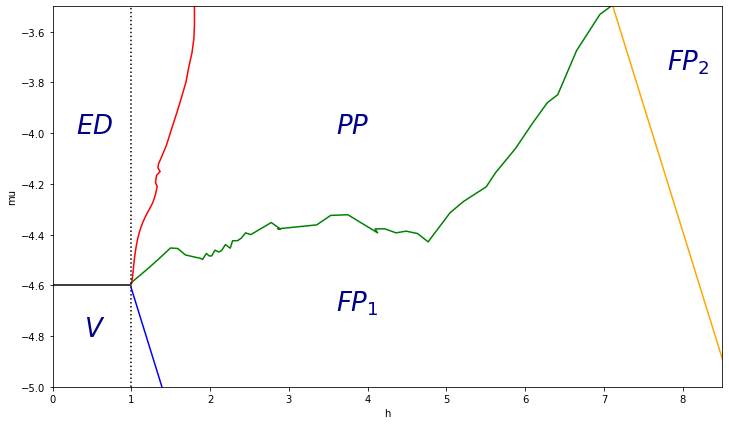

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(h1, mu1, '-', color='green')
plt.plot(h_, mu_, '-', color='red')
plt.axhline(y=(e11/2), color='black', xmax = h1[0]/8.5) 
plt.axvline(x=h1[0], linestyle=':', color='black')
plt.plot(h, mu(h), '-', color = 'blue')
plt.plot(h3, mu3(h3), '-', color = 'orange')
plt.axis([0, 8.5, -5, -3.5])
plt.text(0.3, -4.0, '$ED$', fontsize=26, color='darkblue')
plt.text(0.4, -4.8, '$V$', fontsize=26, color='darkblue')
plt.text(3.6, -4.0, '$PP$', fontsize=26, color='darkblue')
plt.text(3.6, -4.7, '$FP_1$', fontsize=26, color='darkblue')
plt.text(7.8, -3.75, '$FP_2$', fontsize=26, color='darkblue')
plt.xlabel('h')
plt.ylabel('mu')
plt.show()